In [9]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import codac as cdc
from codac.datastore import client
import sys
sys.path.append('/home/jleland/Coding/Projects/flopter')
import external.magnumdbutils as ut
from magopter import Magopter
import os
import glob
import databases.magnum as mdb
import normalisation as nrm

Using matplotlib backend: TkAgg


In [3]:
SPECTROSCOPY_VARS = [
    'AvantesCh1Calibration',
    'AvantesCh1Counts',
    'AvantesCh1DarkCounts',
    'AvantesCh1DelTime',
    'AvantesCh1Description',
    'AvantesCh1IntTime',
    'AvantesCh1NrOfAvg',
    'AvantesCh1SmoothPx',
    'AvantesCh2Calibration',
    'AvantesCh2Counts',
    'AvantesCh2DarkCounts',
    'AvantesCh2DelTime',
    'AvantesCh2Description',
    'AvantesCh2IntTime',
    'AvantesCh2NrOfAvg',
    'AvantesCh2SmoothPx',
    'AvantesCh3Counts',
    'AvantesCh3DarkCounts',
    'AvantesCh3DelTime',
    'AvantesCh3Description',
    'AvantesCh3IntTime',
    'AvantesCh3NrOfAvg',
    'AvantesCh3SmoothPx',
    'AvantesCh4Counts',
    'AvantesCh4DarkCounts',
    'AvantesCh4DelTime',
    'AvantesCh4Description',
    'AvantesCh4IntTime',
    'AvantesCh4NrOfAvg',
    'AvantesCh4SmoothPx',
    'AvantesCh5Counts',
    'AvantesCh5DarkCounts',
    'AvantesCh5DelTime',
    'AvantesCh5Description',
    'AvantesCh5IntTime',
    'AvantesCh5NrOfAvg',
    'AvantesCh5SmoothPx',
    'AvantesCh6Counts',
    'AvantesCh6DarkCounts',
    'AvantesCh6DelTime',
    'AvantesCh6Description',
    'AvantesCh6IntTime',
    'AvantesCh6NrOfAvg',
    'AvantesCh6SmoothPx',
    'AvantesTrigStartFt'
]

SPECTROSCOPY_VARS_OI = [
    'AvantesCh1Counts',
    'AvantesCh2Counts',
    'AvantesCh3Counts',
    'AvantesCh4Counts',
    'AvantesCh5Counts',
    'AvantesCh6Counts'
]

In [4]:
# Get all folders and files associated with Magnum probe data
data_path = Magopter.get_data_path()
folders = next(os.walk(data_path))[1]

files = []
file_folders = []
for folder1 in folders:
    os.chdir(Magopter.get_data_path() + folder1)
    files.extend(glob.glob('*.adc'))
    file_folders.extend([folder1] * len(glob.glob('*.adc')))

files.sort()
folder = file_folders[-2] + '/'

In [5]:
# Collect files of interest
files_oi = files[285:297]
# files_oi = files[285:286]

for i, file in enumerate(files_oi):
    print('{}:    {}'.format(i, file))

0:    2018-06-07 14h 38m 33s TT_06564321037878221702.adc
1:    2018-06-07 14h 44m 50s TT_06564322614655263947.adc
2:    2018-06-07 14h 52m 01s TT_06564324466784157550.adc
3:    2018-06-07 14h 54m 55s TT_06564325214241430142.adc
4:    2018-06-07 14h 57m 35s TT_06564325901568853891.adc
5:    2018-06-07 15h 00m 33s TT_06564326666163147344.adc
6:    2018-06-07 15h 04m 02s TT_06564327561625833147.adc
7:    2018-06-07 15h 06m 23s TT_06564328166274723968.adc
8:    2018-06-07 15h 08m 27s TT_06564328699841427376.adc
9:    2018-06-07 15h 10m 43s TT_06564329285978859221.adc
10:    2018-06-07 15h 13m 34s TT_06564330020250535686.adc
11:    2018-06-07 15h 16m 13s TT_06564330699589276384.adc


In [10]:
spectroscopy_data = {}
ts_data = {}

for f in files_oi: 
    if f == '2018-06-07 14h 38m 33s TT_06564321037878221702.adc':
        m = Magopter(folder, f, ts_filename=files[284])
    else:
        m = Magopter(folder, f)
    if m.ts_temp is not None:
        temps = [np.max(temp) / nrm.ELEM_CHARGE for temp in m.ts_temp[1]]
        denss = [np.max(dens) for dens in m.ts_dens[1]]
        T_e_ts = np.mean(temps)
        d_T_e_ts = np.std(temps) / np.sqrt(len(temps))
        n_e_ts = np.mean(denss)
        d_n_e_ts = np.std(denss) / np.sqrt(len(denss))
    ts_data[f] = [T_e_ts, d_T_e_ts, n_e_ts, d_n_e_ts]
    spectroscopy_data[f] = m.magnum_db.get_data_dict(variables=SPECTROSCOPY_VARS, ref_time=m.timestamp)

Start Time:  13:38:12
End Time:  13:38:52
Beam Down Timestamp:  6564321041100203608 1528375093.15
Regular Timestamp:  6564321037878221702 1528375092.399824
Start Time:  13:44:19
End Time:  13:44:59
Beam Down Timestamp:  6564322614819170496 1528375459.56
Regular Timestamp:  6564322614655263947 1528375459.5218375
Start Time:  13:51:30
End Time:  13:52:10
Beam Down Timestamp:  6564324470159143024 1528375891.54
Regular Timestamp:  6564324466784157550 1528375890.7542
Start Time:  13:54:24
End Time:  13:55:04
Beam Down Timestamp:  6564325217483452528 1528376065.54
Regular Timestamp:  6564325214241430142 1528376064.785158
Start Time:  13:57:04
End Time:  13:57:44
Beam Down Timestamp:  6564325902960233008 1528376225.14
Regular Timestamp:  6564325901568853891 1528376224.8160443
Start Time:  14:00:02
End Time:  14:00:42
Beam Down Timestamp:  6564326670041392016 1528376403.74
Regular Timestamp:  6564326666163147344 1528376402.837026
Start Time:  14:03:31
End Time:  14:04:11
Beam Down Timestamp:  

In [11]:
# print(spectroscopy_data)
for f, data_dict in spectroscopy_data.items():
    print(f)
    for spect_var, spect_data in data_dict.items():
        print('{}: Shape = {}'.format(spect_var, [len(spect_data), np.shape(spect_data[1])]))
    print(ts_data[f])
    print()

2018-06-07 14h 38m 33s TT_06564321037878221702.adc
AvantesCh1Counts: Shape = [2, (15, 2048)]
AvantesCh2Counts: Shape = [2, (15, 2048)]
AvantesCh3Counts: Shape = [2, (15, 2048)]
AvantesCh4Counts: Shape = [2, (15, 2048)]
AvantesCh5Counts: Shape = [2, (15, 2048)]
AvantesCh6Counts: Shape = [2, (15, 2048)]
AvantesTrigStartFt: Shape = [2, (1,)]
[1.6137656341587758, 0.04381394345010781, 1.4098346523263204e+20, 3.752578560797797e+18]

2018-06-07 14h 44m 50s TT_06564322614655263947.adc
AvantesCh1Counts: Shape = [2, (15, 2048)]
AvantesCh2Counts: Shape = [2, (15, 2048)]
AvantesCh3Counts: Shape = [2, (15, 2048)]
AvantesCh4Counts: Shape = [2, (15, 2048)]
AvantesCh5Counts: Shape = [2, (15, 2048)]
AvantesCh6Counts: Shape = [2, (15, 2048)]
AvantesTrigStartFt: Shape = [2, (1,)]
[1.3512119868440398, 0.043910445025539625, 1.839808115507969e+20, 1.978413533709321e+18]

2018-06-07 14h 52m 01s TT_06564324466784157550.adc
AvantesCh1Counts: Shape = [2, (15, 2048)]
AvantesCh2Counts: Shape = [2, (15, 2048)]
Ava

dict_keys(['AvantesCh1Counts', 'AvantesCh2Counts', 'AvantesCh3Counts', 'AvantesCh4Counts', 'AvantesCh5Counts', 'AvantesCh6Counts', 'AvantesTrigStartFt'])
(15, 2048)


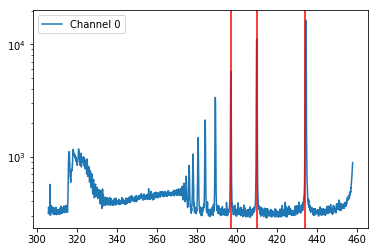

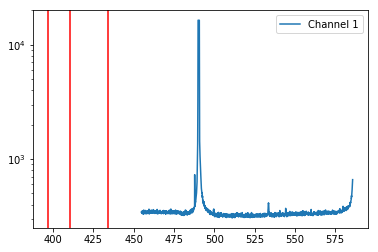

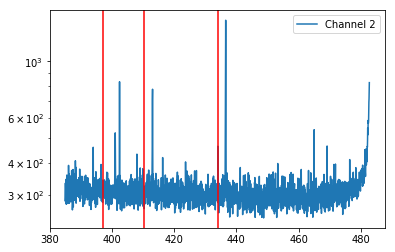

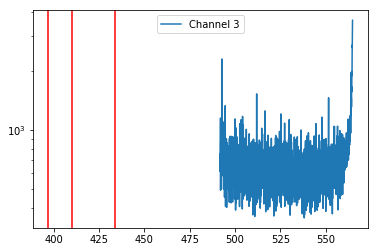

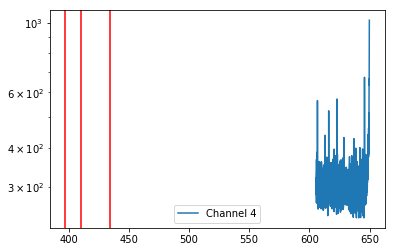

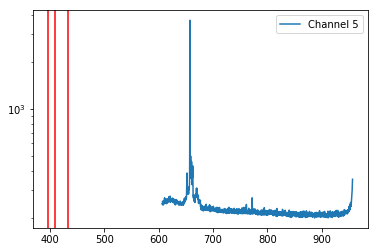

In [73]:
data_dict = spectroscopy_data['2018-06-07 14h 38m 33s TT_06564321037878221702.adc']

print(data_dict.keys())
print(np.shape(data_dict['AvantesCh1Counts'][1]))

wavelength_ranges = [] 
wavelength_ranges.append(np.linspace(299, 451, 2048))
wavelength_ranges.append(np.linspace(448, 579, 2048))
wavelength_ranges.append(np.linspace(378, 476, 2048))
wavelength_ranges.append(np.linspace(485, 558, 2048))
wavelength_ranges.append(np.linspace(599, 643, 2048))
wavelength_ranges.append(np.linspace(600, 950, 2048))

# plt.figure()
for i in range(6):
    plt.figure()
    plt.semilogy(wavelength_ranges[i] + 6.8, data_dict['AvantesCh{}Counts'.format(i+1)][1][0], label='Channel {}'.format(i))
    for h_line in [ 434.0, 410.2, 397.0]:
        plt.axvline(x=h_line, color='red')
    plt.legend()
plt.show()

In [60]:
ts_mag = magopters['2018-06-07 14h 38m 33s TT_06564321037878221702.adc']

print([var for var in vars(ts_mag) if 'ts' in var])

fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
plt.sca(ax[0])
plt.title('Electron temperature and density profiles of Magnum-PSI beam')

for i in range(3):
    plt.errorbar(ts_mag.ts_coords[1][i], ts_mag.ts_temp[1][i] / 1.6e-19, yerr=ts_mag.ts_temp_d[1][i] / 1.6e-19, label='Measurement {}'.format(i))
# plt.xlabel('Beam position / mm')
plt.ylabel(r'$T_e$ / eV')
plt.legend()

plt.sca(ax[1])
for i in range(3):
    plt.errorbar(ts_mag.ts_coords[1][i], ts_mag.ts_dens[1][i], yerr=ts_mag.ts_dens_d[1][i], label='Measurement {}'.format(i))
plt.legend()
plt.xlabel('Radial position / mm')
plt.ylabel(r'$n_e$ / m$^{-3}$')

plt.show()

['ts_file', 'ts_timestamp', 'ts_temp', 'ts_temp_d', 'ts_dens', 'ts_dens_d', 'ts_coords']


In [86]:
np.save('/home/jleland/Data/spectal_data_magnum18.bin', data_dict['AvantesCh1Counts'][1][0])

In [21]:
spectra = {}
for key, values in spectroscopy_data.items():
    times = values['AvantesCh1Counts'][0]
    print(len(times), int(len(times) / 2), times[int(len(times) / 2)])
    spectra[times[int(len(times) / 2)]] = values['AvantesCh1Counts'][1][int(len(times) / 2)]

# spectra = {spectrum['AvantesCh1Counts'][0][7]: spectrum['AvantesCh1Counts'][1][7] for f, spectrum in spectroscopy_data.items()}
# print(spectra.keys())
# print(np.shape(spectra['2018-06-07 14h 38m 33s TT_06564321037878221702.adc'][1]))

plt.figure()
for label, spectrum in spectra.items():
    plt.plot(spectrum, label=label)
plt.legend()
plt.show()

15 7 20.109564906917512
15 7 20.123164693824947
15 7 20.111224880907685
20 10 17.19824578333646
15 7 20.119124757125974
20 10 15.730962657602504
15 7 20.134604514576495
20 10 15.231855032034218
15 7 20.12077473127283
20 10 17.028839316917583
15 7 20.115704810712487
20 10 15.450443303678185


In [22]:
import pandas as pd

df = pd.DataFrame(spectra)
print(df)

       20.109565   20.123165   20.111225   17.198246   20.119125   15.730963  \
0     313.730011  308.510010  312.459991  313.489990  315.989990  313.750000   
1     317.410004  313.660004  315.170013  314.450012  322.950012  321.179993   
2     351.399994  353.459991  351.390015  355.630005  353.070007  356.230011   
3     346.049988  344.929993  346.109985  349.910004  349.510010  347.170013   
4     308.179993  308.239990  311.040009  314.720001  313.809998  312.049988   
5     329.970001  328.410004  329.019989  339.760010  333.489990  336.829987   
6     318.440002  319.000000  320.910004  321.160004  328.880005  329.269989   
7     328.140015  333.230011  331.079987  338.190002  337.709991  332.209991   
8     313.029999  312.070007  313.820007  316.679993  319.970001  320.660004   
9     308.329987  307.640015  312.140015  311.380005  316.470001  313.140015   
10    320.809998  316.950012  316.179993  320.559998  321.799988  320.709991   
11    571.320007  567.539978  564.049988

In [23]:
df.to_csv('/home/jleland/Data/spectral_data_magnum_18.csv')